In [ ]:
import numpy as np
import pandas as pd
import requests
#from config import api_key
import time
#from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt
from fredapi import Fred
import plotly.graph_objects as go
fred = Fred(api_key='8d9168f04897da41e439475a2f472b3f')

In [2]:
gdp_path="GDP.csv"

gdp = pd.read_csv(gdp_path)

gdp_df = pd.DataFrame(gdp)
gdp_df


,DATE,GDP_PC1
0,1948-01-01,9.28509
1,1948-04-01,10.81401
2,1948-07-01,11.86409
3,1948-10-01,7.93894
4,1949-01-01,3.49662
...,...,...
284,2019-01-01,4.64048
285,2019-04-01,4.04721
286,2019-07-01,3.82071
287,2019-10-01,3.97803


In [3]:
df_new = gdp_df.rename(columns={'Date': 'qtr_dt'})
df_new

,DATE,GDP_PC1
0,1948-01-01,9.28509
1,1948-04-01,10.81401
2,1948-07-01,11.86409
3,1948-10-01,7.93894
4,1949-01-01,3.49662
...,...,...
284,2019-01-01,4.64048
285,2019-04-01,4.04721
286,2019-07-01,3.82071
287,2019-10-01,3.97803


In [4]:
df_new['DATE'] = pd.to_datetime(df_new['DATE'])
df_new

,DATE,GDP_PC1
0,1948-01-01,9.28509
1,1948-04-01,10.81401
2,1948-07-01,11.86409
3,1948-10-01,7.93894
4,1949-01-01,3.49662
...,...,...
284,2019-01-01,4.64048
285,2019-04-01,4.04721
286,2019-07-01,3.82071
287,2019-10-01,3.97803


In [5]:
print(df_new.dtypes)


DATE       datetime64[ns]
GDP_PC1           float64
dtype: object


In [6]:
unrate_df = {}
unrate_df['UR'] = fred.get_series('UNRATE',frequency = 'q')
unrate_df = pd.DataFrame(unrate_df)
unrate_df.head()

,UR
1948-01-01,3.7
1948-04-01,3.7
1948-07-01,3.8
1948-10-01,3.8
1949-01-01,4.7


In [7]:
unrate_df.index.name = 'DATE'
unrate_df

,UR
DATE,
1948-01-01,3.7
1948-04-01,3.7
1948-07-01,3.8
1948-10-01,3.8
1949-01-01,4.7
...,...
2019-04-01,3.6
2019-07-01,3.6
2019-10-01,3.5


In [8]:
new_unrate_df = unrate_df.reset_index()
new_unrate_df.head()

,DATE,UR
0,1948-01-01,3.7
1,1948-04-01,3.7
2,1948-07-01,3.8
3,1948-10-01,3.8
4,1949-01-01,4.7


In [9]:
print(new_unrate_df.dtypes)

DATE    datetime64[ns]
UR             float64
dtype: object


In [10]:
merge_gu =pd.merge(df_new, new_unrate_df, on='DATE')
merge_gu

,DATE,GDP_PC1,UR
0,1948-01-01,9.28509,3.7
1,1948-04-01,10.81401,3.7
2,1948-07-01,11.86409,3.8
3,1948-10-01,7.93894,3.8
4,1949-01-01,3.49662,4.7
...,...,...,...
284,2019-01-01,4.64048,3.9
285,2019-04-01,4.04721,3.6
286,2019-07-01,3.82071,3.6
287,2019-10-01,3.97803,3.5


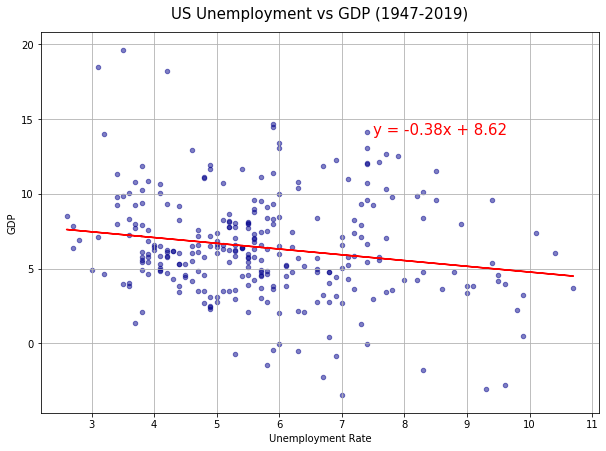

In [11]:
x_values = merge_gu['UR']
y_values = merge_gu['GDP_PC1']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
merge_gu.plot(kind='scatter', x='UR', y='GDP_PC1', color='darkblue', alpha=0.5, figsize=(10, 7), grid=True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7.5,14),fontsize=15,color="red")
plt.xlabel('Unemployment Rate')
plt.ylabel('GDP')
plt.title("US Unemployment vs GDP (1947-2019)", y=1.02, fontsize=15)
#plt.savefig("US Unemployment vs GDP (1947-2019).png")
plt.show()